In [1]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
# import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
from umap import UMAP

c:\Users\Fachirex\Desktop\UNR\TUIA\4° cuatri\MINERIA DE DATOS\PRACTICA\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
cultivos = pd.read_csv('dxCrop_Soil.csv')
cultivos

,temperatura,humedad,aguaEnSuelo,tipoSuelo,tipoCultivo,nitrogeno,potasio,fosforo,nombreFertilizante
0,26.00,52.00,38.00,Arenoso,Maiz,37,0,0,Urea
1,29.00,52.00,45.00,Franco,CañaAzucar,12,0,36,DAP
2,34.00,65.00,62.00,Negro,Algodon,7,9,30,14-35-14
3,32.00,62.00,34.00,Rojo,Tabaco,22,0,20,28-28
4,28.00,54.00,46.00,Arcilloso,Arrozal,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Franco,SemillasOleaginosas,10,14,10,Urea
7996,39.39,71.67,49.34,Negro,Cebada,35,0,0,10-26-26
7997,35.79,67.64,45.04,Rojo,Cebada,41,0,0,Urea
7998,37.78,73.38,36.03,Negro,Tabaco,10,3,30,DAP


In [3]:
cultivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperatura         8000 non-null   float64
 1   humedad             8000 non-null   float64
 2   aguaEnSuelo         8000 non-null   float64
 3   tipoSuelo           8000 non-null   object 
 4   tipoCultivo         8000 non-null   object 
 5   nitrogeno           8000 non-null   int64  
 6   potasio             8000 non-null   int64  
 7   fosforo             8000 non-null   int64  
 8   nombreFertilizante  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [4]:
cultivos.isna().sum() #no hay valores nulos.

temperatura           0
humedad               0
aguaEnSuelo           0
tipoSuelo             0
tipoCultivo           0
nitrogeno             0
potasio               0
fosforo               0
nombreFertilizante    0
dtype: int64

In [5]:
cultivos.describe()

,temperatura,humedad,aguaEnSuelo,nitrogeno,potasio,fosforo
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.429125,3.916375,18.512500
std,4.478262,8.177366,12.596156,11.852406,5.494807,13.244113
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000


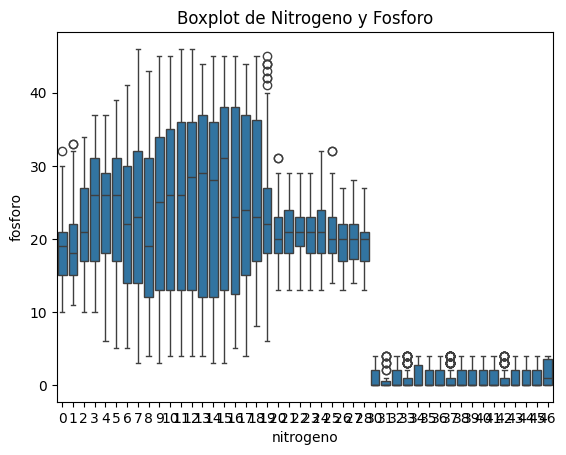

In [24]:
sns.boxplot(data=cultivos, x = "nitrogeno", y = "fosforo")
plt.title('Boxplot de Nitrogeno y Fosforo')
plt.show()

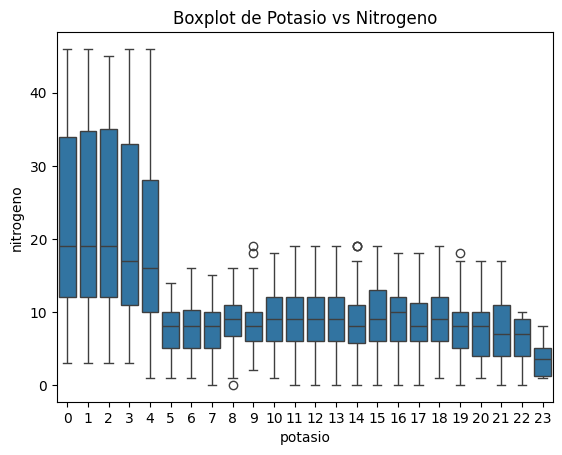

In [22]:
# sns.boxplot(x="nitrogeno", y = "potasio", data=cultivos)
sns.boxplot(x="potasio", y = "nitrogeno", data=cultivos)
plt.title('Boxplot de Potasio vs Nitrogeno')
plt.show()

### Matriz de correlación

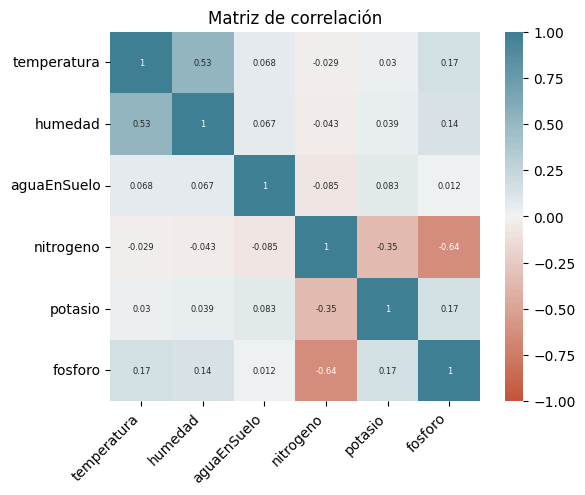

In [9]:
# relaciones: nitrógeno y potasio, fosforo con nitrógeno
cultivos_sub = cultivos.drop(['nombreFertilizante','tipoCultivo','tipoSuelo'], axis=1)
corr = cultivos_sub.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Matriz de correlación')
plt.show()